Testing the factor 'positive'
Inital capital - $1,000,000,000
Divide the capital into 10 portfolio
10 long positons
If the stock released its ESG report and its 'positive' factor is >40, long the stock
Each long position will be held till the last trading day of that year

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import yfinance as yf
from portfolio import Portfolio

In [2]:
# Import ESG Score Data
ESG_score_2017  = pd.read_csv("../ESG_score/ESG_data_2017.csv")
ESG_score_2018  = pd.read_csv("../ESG_score/ESG_data_2018.csv")
ESG_score_2019  = pd.read_csv("../ESG_score/ESG_data_2019.csv")
ESG_score_2020  = pd.read_csv("../ESG_score/ESG_data_2020.csv")
ESG_score_2021  = pd.read_csv("../ESG_score/ESG_data_2021.csv")
ESG_score_2022  = pd.read_csv("../ESG_score/ESG_data_2022.csv")
#ESG_data_2017.sort_values(by=['positive'], ascending=False).head(20)

In [3]:
ESG_report = pd.read_csv("../ESG_report/concatenatedESGData.csv")
ESG_report = ESG_report.drop(['Unnamed: 0'], axis=1)
# ESG_report_2017.loc[ESG_report['stock_code'] == '02196.HK']
#ESG_report_2017.sort_values(by=['ESG_2017_rel_date'], ascending=False)

In [4]:
ESG_report['ESG_2017_rel_date'] = pd.to_datetime(ESG_report['ESG_2017_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2018_rel_date'] = pd.to_datetime(ESG_report['ESG_2018_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2019_rel_date'] = pd.to_datetime(ESG_report['ESG_2019_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2020_rel_date'] = pd.to_datetime(ESG_report['ESG_2020_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2021_rel_date'] = pd.to_datetime(ESG_report['ESG_2021_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2022_rel_date'] = pd.to_datetime(ESG_report['ESG_2022_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2023_rel_date'] = pd.to_datetime(ESG_report['ESG_2023_rel_date'], format='%d/%m/%Y')
ESG_report = ESG_report.drop(563)
# ESG_report.sort_values(by=['ESG_2017_rel_date'], ascending=False).head(50)

In [8]:
portfolio = Portfolio(1000000, 10, 30, ESG_report, ESG_score_2017, ESG_score_2018, ESG_score_2019, ESG_score_2020, ESG_score_2021, ESG_score_2022)

In [9]:
portfolio.get_balance()

1000000

In [10]:
portfolio.strategy("01-01-2018", "31-12-2021")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0763.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-17 -> 2018-03-18)')



17-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-18 -> 2018-03-19)')



18-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0338.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0857.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2628.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*****************


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-24 -> 2018-03-25)')



24-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1171.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-25 -> 2018-03-26)')



25-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1288.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-30 -> 2018-03-31)')



30-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-31 -> 2018-04-01)')



31-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-01 -> 2018-04-02)')



01-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-02 -> 2018-04-03)')



02-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-05 -> 2018-04-06)')



05-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-07 -> 2018-04-08)')



07-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-08 -> 2018-04-09)')



08-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-14 -> 2018-04-15)')



14-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-15 -> 2018-04-16)')



15-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2196.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-21 -> 2018-04-22)')



21-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-22 -> 2018-04-23)')



22-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0670.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0011.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['2039.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-28 -> 2018-04-29)')



28-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2039.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-29 -> 2018-04-30)')



29-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-01 -> 2018-05-02)')



01-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-05 -> 2018-05-06)')



05-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-06 -> 2018-05-07)')



06-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-12 -> 2018-05-13)')



12-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-13 -> 2018-05-14)')



13-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-19 -> 2018-05-20)')



19-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-20 -> 2018-05-21)')



20-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0066.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-22 -> 2018-05-23)')



22-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-26 -> 2018-05-27)')



26-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-27 -> 2018-05-28)')



27-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-02 -> 2018-06-03)')



02-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-03 -> 2018-06-04)')



03-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-09 -> 2018-06-10)')



09-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-10 -> 2018-06-11)')



10-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2607.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-16 -> 2018-06-17)')



16-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-17 -> 2018-06-18)')



17-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-18 -> 2018-06-19)')



18-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-23 -> 2018-06-24)')



23-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-24 -> 2018-06-25)')



24-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0743.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2202.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-30 -> 2018-07-01)')



30-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-01 -> 2018-07-02)')



01-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 8325.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-02 -> 2018-07-03)')



02-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-07 -> 2018-07-08)')



07-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-08 -> 2018-07-09)')



08-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0836.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-14 -> 2018-07-15)')



14-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-15 -> 2018-07-16)')



15-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0743.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-21 -> 2018-07-22)')



21-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0743.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-22 -> 2018-07-23)')



22-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0762.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-28 -> 2018-07-29)')



28-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0762.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-29 -> 2018-07-30)')



29-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-04 -> 2018-08-05)')



04-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-05 -> 2018-08-06)')



05-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-11 -> 2018-08-12)')



11-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-12 -> 2018-08-13)')



12-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-18 -> 2018-08-19)')



18-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-19 -> 2018-08-20)')



19-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0486.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-25 -> 2018-08-26)')



25-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0486.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-26 -> 2018-08-27)')



26-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0992.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-01 -> 2018-09-02)')



01-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-02 -> 2018-09-03)')



02-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-08 -> 2018-09-09)')



08-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-09 -> 2018-09-10)')



09-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-15 -> 2018-09-16)')



15-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-16 -> 2018-09-17)')



16-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-22 -> 2018-09-23)')



22-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-23 -> 2018-09-24)')



23-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-25 -> 2018-09-26)')



25-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-29 -> 2018-09-30)')



29-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-30 -> 2018-10-01)')



30-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-10-01 -> 2018-10-02)')



01-10-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0005.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-09 -> 2019-03-10)')



09-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-10 -> 2019-03-11)')



10-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2318.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-16 -> 2019-03-17)')



16-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-17 -> 2019-03-18)')



17-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0338.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0914.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-23 -> 2019-03-24)')



23-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-24 -> 2019-03-25)')



24-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0763.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-30 -> 2019-03-31)')



30-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-03-31 -> 2019-04-01)')



31-03-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-05 -> 2019-04-06)')



05-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-06 -> 2019-04-07)')



06-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-07 -> 2019-04-08)')



07-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-13 -> 2019-04-14)')



13-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-14 -> 2019-04-15)')



14-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0857.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-19 -> 2019-04-20)')



19-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-20 -> 2019-04-21)')



20-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-21 -> 2019-04-22)')



21-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0338.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-22 -> 2019-04-23)')



22-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-27 -> 2019-04-28)')



27-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-28 -> 2019-04-29)')



28-04-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0316.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-01 -> 2019-05-02)')



01-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-04 -> 2019-05-05)')



04-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-05 -> 2019-05-06)')



05-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-11 -> 2019-05-12)')



11-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-12 -> 2019-05-13)')



12-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0941.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-13 -> 2019-05-14)')



13-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-18 -> 2019-05-19)')



18-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-19 -> 2019-05-20)')



19-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3618.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-25 -> 2019-05-26)')



25-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-05-26 -> 2019-05-27)')



26-05-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0066.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2378.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-01 -> 2019-06-02)')



01-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2378.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-02 -> 2019-06-03)')



02-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2378.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-07 -> 2019-06-08)')



07-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2378.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-08 -> 2019-06-09)')



08-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2378.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-09 -> 2019-06-10)')



09-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3377.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2007.HK
[*********************100%%**********************]  1 of


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-15 -> 2019-06-16)')



15-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-16 -> 2019-06-17)')



16-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0817.HK


1 Failed download:
['3898.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-22 -> 2019-06-23)')



22-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0270.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3898.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-23 -> 2019-06-24)')



23-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2202.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0743.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-29 -> 2019-06-30)')



29-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-06-30 -> 2019-07-01)')



30-06-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-01 -> 2019-07-02)')



01-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0293.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-06 -> 2019-07-07)')



06-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-07 -> 2019-07-08)')



07-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2007.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-13 -> 2019-07-14)')



13-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2007.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-14 -> 2019-07-15)')



14-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2238.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0817.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-20 -> 2019-07-21)')



20-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0817.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-21 -> 2019-07-22)')



21-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2899.HK


1 Failed download:
['2099.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-27 -> 2019-07-28)')



27-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2099.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-28 -> 2019-07-29)')



28-07-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0486.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3933.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-03 -> 2019-08-04)')



03-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-04 -> 2019-08-05)')



04-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2238.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-10 -> 2019-08-11)')



10-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2238.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-11 -> 2019-08-12)')



11-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2899.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-17 -> 2019-08-18)')



17-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2899.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-18 -> 2019-08-19)')



18-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2899.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-24 -> 2019-08-25)')



24-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2899.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-25 -> 2019-08-26)')



25-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0992.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-31 -> 2019-09-01)')



31-08-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-01 -> 2019-09-02)')



01-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-07 -> 2019-09-08)')



07-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-08 -> 2019-09-09)')



08-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-14 -> 2019-09-15)')



14-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-15 -> 2019-09-16)')



15-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-21 -> 2019-09-22)')



21-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-22 -> 2019-09-23)')



22-09-2019 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2318.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-02-22 -> 2020-02-23)')



22-02-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-02-23 -> 2020-02-24)')



23-02-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-02-29 -> 2020-03-01)')



29-02-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-01 -> 2020-03-02)')



01-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-07 -> 2020-03-08)')



07-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-08 -> 2020-03-09)')



08-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0005.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-14 -> 2020-03-15)')



14-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-15 -> 2020-03-16)')



15-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3968.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-21 -> 2020-03-22)')



21-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-22 -> 2020-03-23)')



22-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1658.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1816.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-28 -> 2020-03-29)')



28-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-03-29 -> 2020-03-30)')



29-03-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-04 -> 2020-04-05)')



04-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-05 -> 2020-04-06)')



05-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-10 -> 2020-04-11)')



10-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-11 -> 2020-04-12)')



11-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-12 -> 2020-04-13)')



12-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0005.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-13 -> 2020-04-14)')



13-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['3968.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-18 -> 2020-04-19)')



18-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3968.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-19 -> 2020-04-20)')



19-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0003.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1658.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-25 -> 2020-04-26)')



25-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1658.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-26 -> 2020-04-27)')



26-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3698.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1898.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-30 -> 2020-05-01)')



30-04-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-01 -> 2020-05-02)')



01-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-02 -> 2020-05-03)')



02-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-03 -> 2020-05-04)')



03-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-09 -> 2020-05-10)')



09-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-10 -> 2020-05-11)')



10-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0489.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-16 -> 2020-05-17)')



16-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0998.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-17 -> 2020-05-18)')



17-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0011.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2607.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-23 -> 2020-05-24)')



23-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-24 -> 2020-05-25)')



24-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2238.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3320.HK
[*********************100%%**********************]  1 of


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-30 -> 2020-05-31)')



30-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-31 -> 2020-06-01)')



31-05-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-06 -> 2020-06-07)')



06-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-07 -> 2020-06-08)')



07-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2388.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0268.HK
[*********************100%%**********************]  1 of


1 Failed download:
['0489.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-13 -> 2020-06-14)')



13-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0489.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-14 -> 2020-06-15)')



14-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2601.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1972.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-20 -> 2020-06-21)')



20-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1972.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-21 -> 2020-06-22)')



21-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2238.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-25 -> 2020-06-26)')



25-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0293.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0303.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-27 -> 2020-06-28)')



27-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0303.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-06-28 -> 2020-06-29)')



28-06-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0743.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1551.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0303.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-01 -> 2020-07-02)')



01-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0303.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-04 -> 2020-07-05)')



04-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0303.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-05 -> 2020-07-06)')



05-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2601.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-11 -> 2020-07-12)')



11-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2601.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-12 -> 2020-07-13)')



12-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2009.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0336.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-18 -> 2020-07-19)')



18-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0336.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-19 -> 2020-07-20)')



19-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0019.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-25 -> 2020-07-26)')



25-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0019.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-07-26 -> 2020-07-27)')



26-07-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0884.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-01 -> 2020-08-02)')



01-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0884.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-02 -> 2020-08-03)')



02-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0884.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-08 -> 2020-08-09)')



08-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0884.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-09 -> 2020-08-10)')



09-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0981.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-15 -> 2020-08-16)')



15-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0981.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-16 -> 2020-08-17)')



16-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0981.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-22 -> 2020-08-23)')



22-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0981.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-23 -> 2020-08-24)')



23-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0992.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-29 -> 2020-08-30)')



29-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-30 -> 2020-08-31)')



30-08-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-05 -> 2020-09-06)')



05-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-06 -> 2020-09-07)')



06-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-12 -> 2020-09-13)')



12-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-13 -> 2020-09-14)')



13-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-19 -> 2020-09-20)')



19-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-20 -> 2020-09-21)')



20-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-26 -> 2020-09-27)')



26-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-27 -> 2020-09-28)')



27-09-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0247.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0083.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-12-19 -> 2020-12-20)')



19-12-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-12-20 -> 2020-12-21)')



20-12-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-12-25 -> 2020-12-26)')



25-12-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-12-26 -> 2020-12-27)')



26-12-2020 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-12-27 -> 2020-12-28)')



27-12-2020 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-01 -> 2021-01-02)')



01-01-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-02 -> 2021-01-03)')



02-01-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-03 -> 2021-01-04)')



03-01-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-09 -> 2021-01-10)')



09-01-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0247.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-10 -> 2021-01-11)')



10-01-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2318.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-06 -> 2021-02-07)')



06-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-07 -> 2021-02-08)')



07-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-12 -> 2021-02-13)')



12-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-13 -> 2021-02-14)')



13-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-14 -> 2021-02-15)')



14-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-15 -> 2021-02-16)')



15-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-20 -> 2021-02-21)')



20-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-21 -> 2021-02-22)')



21-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-27 -> 2021-02-28)')



27-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-02-28 -> 2021-03-01)')



28-02-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-06 -> 2021-03-07)')



06-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2318.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-07 -> 2021-03-08)')



07-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2343.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-13 -> 2021-03-14)')



13-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-14 -> 2021-03-15)')



14-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1299.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0763.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-20 -> 2021-03-21)')



20-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-21 -> 2021-03-22)')



21-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 6886.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-27 -> 2021-03-28)')



27-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-28 -> 2021-03-29)')



28-03-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-02 -> 2021-04-03)')



02-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-03 -> 2021-04-04)')



03-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-04 -> 2021-04-05)')



04-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-05 -> 2021-04-06)')



05-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-06 -> 2021-04-07)')



06-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-10 -> 2021-04-11)')



10-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2343.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-11 -> 2021-04-12)')



11-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['1816.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-17 -> 2021-04-18)')



17-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1816.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-18 -> 2021-04-19)')



18-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2196.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3377.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0902.HK
[*********************100%%*****************


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-24 -> 2021-04-25)')



24-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-25 -> 2021-04-26)')



25-04-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0670.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0656.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-01 -> 2021-05-02)')



01-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-02 -> 2021-05-03)')



02-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-08 -> 2021-05-09)')



08-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-09 -> 2021-05-10)')



09-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-15 -> 2021-05-16)')



15-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-16 -> 2021-05-17)')



16-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0293.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-19 -> 2021-05-20)')



19-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3898.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0003.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-22 -> 2021-05-23)')



22-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0003.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-23 -> 2021-05-24)')



23-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 6088.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1109.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-29 -> 2021-05-30)')



29-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0358.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1109.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-30 -> 2021-05-31)')



30-05-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1606.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-05 -> 2021-06-06)')



05-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-06 -> 2021-06-07)')



06-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-12 -> 2021-06-13)')



12-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-13 -> 2021-06-14)')



13-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0293.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-14 -> 2021-06-15)')



14-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['3898.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-19 -> 2021-06-20)')



19-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3898.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-20 -> 2021-06-21)')



20-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2319.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['6199.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-26 -> 2021-06-27)')



26-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['6199.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-27 -> 2021-06-28)')



27-06-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0019.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0753.HK
[*********************100%%**********************]  1 of


1 Failed download:
['0358.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-01 -> 2021-07-02)')



01-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0336.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-03 -> 2021-07-04)')



03-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0336.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-04 -> 2021-07-05)')



04-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 3319.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-10 -> 2021-07-11)')



10-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-11 -> 2021-07-12)')



11-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 9983.HK


1 Failed download:
['2319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-17 -> 2021-07-18)')



17-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-18 -> 2021-07-19)')



18-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 1551.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2202.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-24 -> 2021-07-25)')



24-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2202.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-25 -> 2021-07-26)')



25-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0604.HK
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-31 -> 2021-08-01)')



31-07-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3319.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-01 -> 2021-08-02)')



01-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['9983.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-07 -> 2021-08-08)')



07-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['9983.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-08 -> 2021-08-09)')



08-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['9983.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-14 -> 2021-08-15)')



14-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['9983.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-15 -> 2021-08-16)')



15-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2727.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-21 -> 2021-08-22)')



21-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2727.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-22 -> 2021-08-23)')



22-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0992.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-28 -> 2021-08-29)')



28-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3933.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-29 -> 2021-08-30)')



29-08-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0384.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-04 -> 2021-09-05)')



04-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-05 -> 2021-09-06)')



05-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-11 -> 2021-09-12)')



11-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-12 -> 2021-09-13)')



12-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-18 -> 2021-09-19)')



18-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-19 -> 2021-09-20)')



19-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-22 -> 2021-09-23)')



22-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-25 -> 2021-09-26)')



25-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-26 -> 2021-09-27)')



26-09-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2799.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-20 -> 2021-11-21)')



20-11-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-21 -> 2021-11-22)')



21-11-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 2282.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0247.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0083.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*****************


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-27 -> 2021-11-28)')



27-11-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-28 -> 2021-11-29)')



28-11-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
buy 0016.HK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-04 -> 2021-12-05)')



04-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-05 -> 2021-12-06)')



05-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-11 -> 2021-12-12)')



11-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-12 -> 2021-12-13)')



12-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-18 -> 2021-12-19)')



18-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2799.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-19 -> 2021-12-20)')



19-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['2282.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-25 -> 2021-12-26)')



25-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2282.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-26 -> 2021-12-27)')



26-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2282.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-27 -> 2021-12-28)')



27-12-2021 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
daily_pls = portfolio.get_daily_pls()
for daily_pl in daily_pls:
    print("date: " + daily_pl["date"].strftime("%d-%m-%Y") + ", pl: " + str(daily_pl["pl"]) + ", balance: " + str(daily_pl["balance"]))

date: 01-01-2018, pl: 0, balance: 1000000
date: 02-01-2018, pl: 0, balance: 1000000
date: 03-01-2018, pl: 0, balance: 1000000
date: 04-01-2018, pl: 0, balance: 1000000
date: 05-01-2018, pl: 0, balance: 1000000
date: 06-01-2018, pl: 0, balance: 1000000
date: 07-01-2018, pl: 0, balance: 1000000
date: 08-01-2018, pl: 0, balance: 1000000
date: 09-01-2018, pl: 0, balance: 1000000
date: 10-01-2018, pl: 0, balance: 1000000
date: 11-01-2018, pl: 0, balance: 1000000
date: 12-01-2018, pl: 0, balance: 1000000
date: 13-01-2018, pl: 0, balance: 1000000
date: 14-01-2018, pl: 0, balance: 1000000
date: 15-01-2018, pl: 0, balance: 1000000
date: 16-01-2018, pl: 0, balance: 1000000
date: 17-01-2018, pl: 0, balance: 1000000
date: 18-01-2018, pl: 0, balance: 1000000
date: 19-01-2018, pl: 0, balance: 1000000
date: 20-01-2018, pl: 0, balance: 1000000
date: 21-01-2018, pl: 0, balance: 1000000
date: 22-01-2018, pl: 0, balance: 1000000
date: 23-01-2018, pl: 0, balance: 1000000
date: 24-01-2018, pl: 0, balance: 

In [12]:
process_daily_pls = []
for index in range(len(daily_pls)):
    if index != 0:
        process_row = {'date': daily_pls[index]["date"].strftime("%Y-%m-%d"), 'pl': (daily_pls[index]['pl'] / 1000000) * 100}
    else:
        process_row = {'date': daily_pls[index]["date"].strftime("%Y-%m-%d"), 'pl': 0}
    process_daily_pls.append(process_row)

In [13]:
def get_stock_price():
    start = datetime.datetime(2018, 1, 1).date()
    end = datetime.datetime(2021, 12, 31).date()
    # end = start + datetime.timedelta(days=35)
    # print(end)
    stock_data = yf.download("^HSI", start, end)
    # print(stock_data)
    return stock_data

HSI_price = get_stock_price()

[*********************100%%**********************]  1 of 1 completed


In [14]:
HSI_returns = []
for index, row in HSI_price.iterrows():
    date = index.date().strftime("%Y-%m-%d")
    if date != "2018-01-02":
        new_price = row["Close"]
        HSI_return = {"date": date, "pl": ((new_price - prev_price) / prev_price) * 100}
    else:
        HSI_return = {"date": date, "pl": 0}
        prev_price = row["Close"]
    HSI_returns.append(HSI_return)

In [15]:
columns = ['date', 'strategy_return', 'HSI_return']
result = pd.DataFrame(columns=columns)
HSI_returns_idx = 0
for index in range(len(process_daily_pls)):
    # print(process_daily_pls[index]['date'], HSI_returns[HSI_returns_idx]['date'])
    if HSI_returns_idx == len(HSI_returns):
        break
    elif process_daily_pls[index]['date'] == HSI_returns[HSI_returns_idx]['date']:
        row = [process_daily_pls[index]['date'], process_daily_pls[index]['pl'], HSI_returns[HSI_returns_idx]['pl']]
        result.loc[len(result.index)] = row
        HSI_returns_idx += 1
    else:
        pass

In [16]:
result['date'] = pd.to_datetime(result['date'], format='%Y-%m-%d')
result

,date,strategy_return,HSI_return
0,2018-01-02,0.000000,0.000000
1,2018-01-03,0.000000,0.149560
2,2018-01-04,0.000000,0.724783
3,2018-01-05,0.000000,0.980918
4,2018-01-08,0.000000,1.259102
...,...,...,...
981,2021-12-23,39.034053,-23.993431
982,2021-12-24,39.641687,-23.894729
983,2021-12-28,40.461236,-23.708590
984,2021-12-29,40.490776,-24.344407


In [17]:
result = result.set_index('date', drop=True)

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fc50897a370>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17897.0, 0, '2019-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18993.0, 0, '2022-01-01')])

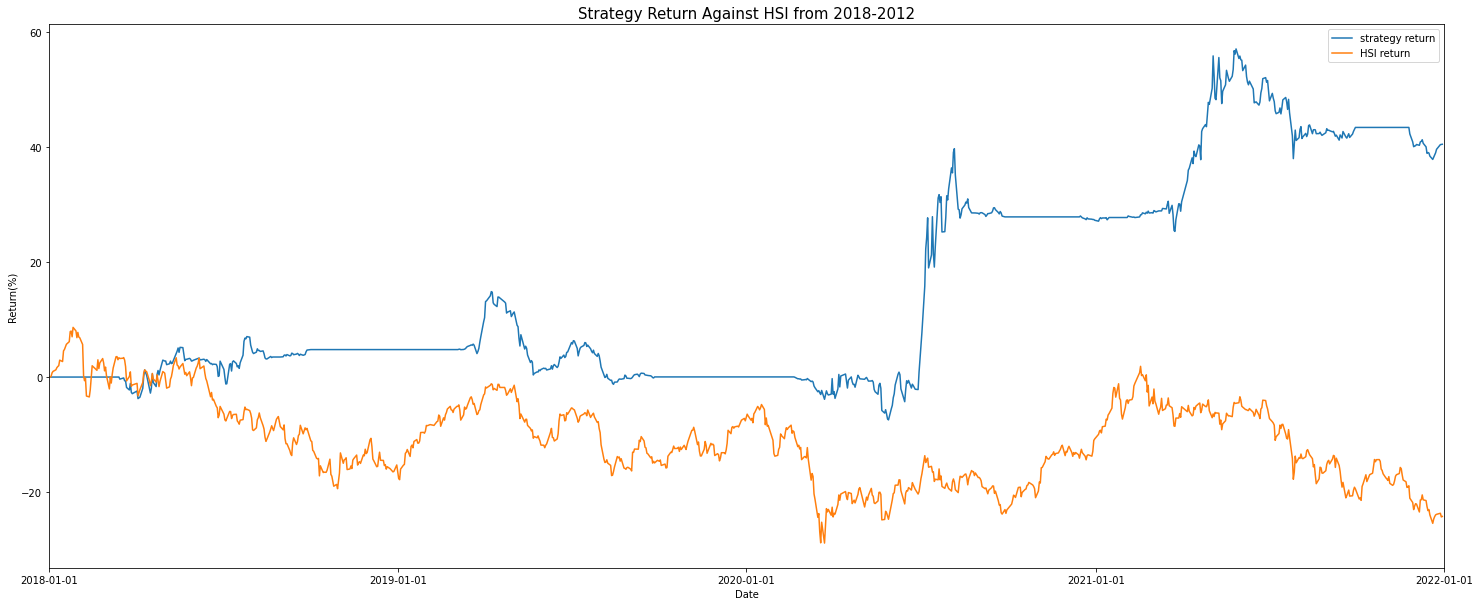

In [41]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Against HSI from 2018-2012', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result.index, result['strategy_return'], label="strategy return")
plt.plot(result.index, result['HSI_return'], label="HSI return")
plt.legend()

plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']
plt.xticks(ticks)

In [23]:
for daily_pl in daily_pls:
    print("date: " + daily_pl["date"].strftime("%d-%m-%Y") + ", pl: " + str(daily_pl["pl"]) + ", balance: " + str(daily_pl["balance"]))

date: 01-01-2018, pl: 0, balance: 1000000
date: 02-01-2018, pl: 0, balance: 1000000
date: 03-01-2018, pl: 0, balance: 1000000
date: 04-01-2018, pl: 0, balance: 1000000
date: 05-01-2018, pl: 0, balance: 1000000
date: 06-01-2018, pl: 0, balance: 1000000
date: 07-01-2018, pl: 0, balance: 1000000
date: 08-01-2018, pl: 0, balance: 1000000
date: 09-01-2018, pl: 0, balance: 1000000
date: 10-01-2018, pl: 0, balance: 1000000
date: 11-01-2018, pl: 0, balance: 1000000
date: 12-01-2018, pl: 0, balance: 1000000
date: 13-01-2018, pl: 0, balance: 1000000
date: 14-01-2018, pl: 0, balance: 1000000
date: 15-01-2018, pl: 0, balance: 1000000
date: 16-01-2018, pl: 0, balance: 1000000
date: 17-01-2018, pl: 0, balance: 1000000
date: 18-01-2018, pl: 0, balance: 1000000
date: 19-01-2018, pl: 0, balance: 1000000
date: 20-01-2018, pl: 0, balance: 1000000
date: 21-01-2018, pl: 0, balance: 1000000
date: 22-01-2018, pl: 0, balance: 1000000
date: 23-01-2018, pl: 0, balance: 1000000
date: 24-01-2018, pl: 0, balance: 

In [26]:
for transactions in portfolio.get_transactions():
    print("date: " + transactions["date"].strftime("%d-%m-%Y") + 
          " ticker: " + transactions['ticker'] + 
          " amount: " + transactions['amount'] +
          " remaining_capital" + transactions['remaining_capital'])



date: 15-03-2018 ticker: 0763.HK amount: -99990.0973739624 remaining_capital900009.9026260376
date: 20-03-2018 ticker: 0338.HK amount: -100000.57765007019 remaining_capital800009.3249759674
date: 22-03-2018 ticker: 0857.HK amount: -99998.99379396439 remaining_capital700010.331182003
date: 22-03-2018 ticker: 2628.HK amount: -114277.5 remaining_capital585732.831182003
date: 23-03-2018 ticker: 2208.HK amount: -97620.2520160675 remaining_capital488112.5791659355
date: 23-03-2018 ticker: 3968.HK amount: -117126.00551605225 remaining_capital370986.57364988327
date: 26-03-2018 ticker: 1171.HK amount: -92742.0 remaining_capital278244.57364988327
date: 26-03-2018 ticker: 1288.HK amount: -123662.00268030167 remaining_capital154582.5709695816
date: 28-03-2018 ticker: 2039.HK amount: -77291.19069671631 remaining_capital77291.3802728653
date: 28-03-2018 ticker: 6818.HK amount: -154582.5 remaining_capital-77291.1197271347
date: 16-04-2018 ticker: 0763.HK amount: +88115.2013130188 remaining_capital10

In [27]:
# start = datetime.datetime(2021, 6, 2).date()
# end = datetime.datetime(2021, 7, 6).date()
# end = start + datetime.timedelta(days=35)
# print(end)
hi = yf.download("0336.HK", datetime.datetime(2021, 6, 2).date(), datetime.datetime(2021, 7, 6).date())
# print(stock_data)
hi

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-02,12.860000,15.160000,12.860000,15.020000,14.426401,22283450
2021-06-03,15.020000,15.400000,14.360000,15.220000,14.618496,7891952
2021-06-04,15.260000,15.480000,13.260000,13.720000,13.177776,19840600
2021-06-07,13.820000,14.140000,13.360000,13.400000,12.870423,4123000
2021-06-08,13.700000,13.700000,12.840000,13.000000,12.486231,6204850
2021-06-09,13.000000,13.320000,12.500000,12.920000,12.409393,4625000
2021-06-10,12.940000,13.180000,12.680000,12.860000,12.351764,3768000
2021-06-11,13.260000,14.200000,12.900000,13.240000,12.716746,7499000
2021-06-15,13.480000,13.800000,13.100000,13.740000,13.196984,6566500


In [7]:
print(datetime.datetime(2018, 1, 1).date())
string1 = "01-01-2018"

print(datetime.datetime.strptime(string1, '%m-%d-%Y').date())

2018-01-01
2018-01-01
